In [34]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\OneNote Notebooks\wids.tsv", sep="\t")

In [35]:
df.head(40)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [37]:
df.columns.size
df.shape[1]


5

In [38]:
# Sum the quantities per item and find the max
most_ordered = df.groupby('item_name')['quantity'].sum().idxmax()
print("Most ordered item:", most_ordered)


Most ordered item: Chicken Bowl


In [39]:
most_ordered = df.groupby('item_name')['quantity'].sum()
print("Most ordered item:", most_ordered)

Most ordered item: item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl        

In [40]:

# Convert 'Item Price' column to float (removing any $ or ₹ symbols if present)
df['item_price'] = df['item_price'].replace('[\$,₹]', '', regex=True).astype(float)

df.dtypes

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Asus\AppData\Local\Temp\ipykernel_17008\983194194.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['item_price'] = df['item_price'].replace('[\$,₹]', '', regex=True).astype(float)


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [41]:
total_revenue = (df['item_price'] * df['quantity']).sum()
print("Total revenue for the period:", total_revenue)

Total revenue for the period: 39237.02


In [42]:
df['quantity'].sum()

np.int64(4972)

In [43]:
# Calculate revenue per order
df['Revenue'] = df['item_price'] * df['quantity']

# Average revenue per order
avg_revenue_per_order = df['Revenue'].mean()
print("Average revenue per order:", avg_revenue_per_order)

Average revenue per order: 8.48918649935093


In [44]:
# Filter rows where item_price > 8
EF= df[df['item_price'] > 8]
EF.head()

# # Count unique item names in this filtered dataset
unique_expensive_count = EF['item_name'].nunique()
print("Number of unique items with price > $8:", unique_expensive_count)


Number of unique items with price > $8: 35


In [45]:
EF=df[['item_price' ,'item_name']]
EF.head()


,item_price,item_name
0,2.39,Chips and Fresh Tomato Salsa
1,3.39,Izze
2,3.39,Nantucket Nectar
3,2.39,Chips and Tomatillo-Green Chili Salsa
4,16.98,Chicken Bowl


In [46]:
# Sort the DataFrame by item_name alphabetically
df_sorted = df.sort_values(by='item_name')

# Display the sorted DataFrame
df_sorted.head(10)

,order_id,quantity,item_name,choice_description,item_price,Revenue
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98,25.96
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49,6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49,6.49
3422,1373,1,6 Pack Soft Drink,[Coke],6.49,6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1916,774,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1922,776,1,6 Pack Soft Drink,[Coke],6.49,6.49
1937,784,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49


In [47]:
ME=df.groupby('item_name')['item_price'].max()

MV=ME.idxmax()
MM=df.groupby('item_name')['quantity'].sum()
order = MM.loc[MV]
order



np.int64(130)

In [48]:
ME=df.groupby('item_name' , as_index=False)['item_price'].max()
MV = ME.loc[ME['item_price'].idxmax(), 'item_name']
MV

'Chips and Fresh Tomato Salsa'

In [49]:
MM=df.groupby('item_name' ,as_index=False )['quantity'].sum()
veggie_ordered = MM.loc[MM['item_name'] == 'Veggie Salad Bowl', 'quantity']
veggie_ordered

48    18
Name: quantity, dtype: int64

In [50]:
df_new= df.copy()
df_new.loc[ 0:2 ,'quantity']=np.nan
df_new.head()

,order_id,quantity,item_name,choice_description,item_price,Revenue
0,1,NaN,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,NaN,Izze,[Clementine],3.39,3.39
2,1,NaN,Nantucket Nectar,[Apple],3.39,3.39
3,1,1.0,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [51]:
df_new[['quantity', 'item_price']].fillna({
    'quantity': 2,
    'item_price': 7
} , inplace=True)

df_new.head(40)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17008\2878323979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['quantity', 'item_price']].fillna({


,order_id,quantity,item_name,choice_description,item_price,Revenue
0,1,NaN,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,NaN,Izze,[Clementine],3.39,3.39
2,1,NaN,Nantucket Nectar,[Apple],3.39,3.39
3,1,1.0,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1.0,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
6,3,1.0,Side of Chips,NaN,1.69,1.69
7,4,1.0,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1.0,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
9,5,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25


In [52]:
df_new2=np.random.randint(0, len(df)-1 , size=10)
df_new2

array([3822, 4127, 2604,  614, 1058, 3135, 1598, 2459, 2523, 1593],
      dtype=int32)

In [53]:
df_new.dropna(axis=0 ,inplace=False)


,order_id,quantity,item_name,choice_description,item_price,Revenue
4,2,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1.0,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
7,4,1.0,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1.0,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
9,5,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25
...,...,...,...,...,...,...
4617,1833,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [54]:
df.isna().sum().sum()


np.int64(1246)

In [55]:
MM=df.groupby('item_name')['quantity'].sum()
top5 = MM.sort_values(ascending=False).head(5)
top5

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

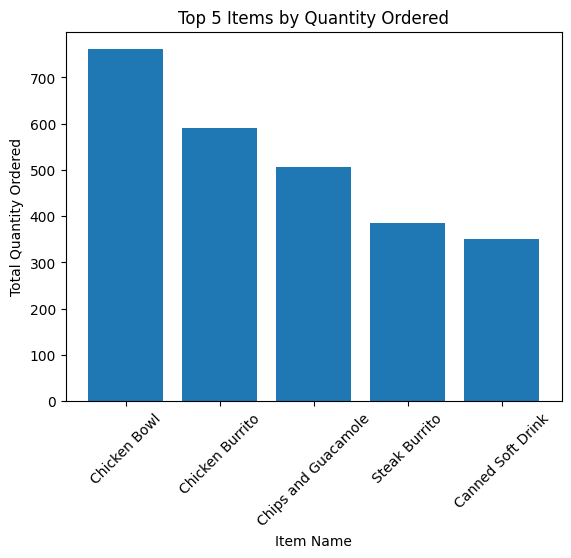

In [56]:
import matplotlib.pyplot as plt

plt.bar(top5.index, top5.values)
plt.xlabel("Item Name")
plt.ylabel("Total Quantity Ordered")
plt.title("Top 5 Items by Quantity Ordered")
plt.xticks(rotation=45)
plt.show()


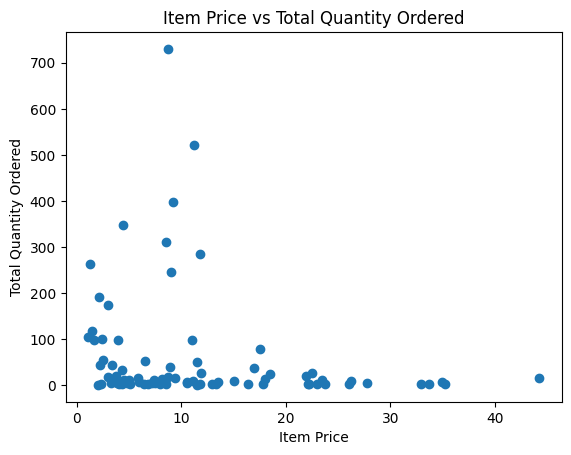

In [57]:
import matplotlib.pyplot as plt

MM = df.groupby('item_price')['quantity'].sum()

plt.scatter(MM.index, MM.values)
plt.xlabel("Item Price")
plt.ylabel("Total Quantity Ordered")
plt.title("Item Price vs Total Quantity Ordered")
plt.show()
